In [27]:
import numpy
import torch
import datetime
from load_estimation import *

In [22]:
dayLen = 2
nowDate = datetime.datetime(2022, 7, 10, 0)
dbClass_Seoultech_Future = DBSeoultech_LOADEST(
    timeInfo={
        "ST" : nowDate,
        "ED" : nowDate + datetime.timedelta(days=dayLen)},
    connectInfo={
        "SERVER" : "114.71.51.11:21240",
        "DBNAME" : "서울과기대_PMS_log",
        "USER"   : "sa",
        "PWD"    : "Rceit1!"})
dbClass_Seoultech_Future.fetchDBTableData()

In [29]:
estimated_Profile, input = miraeload_HorizonEst("./load_estimation/nn_model/Seq2Seq_final.pt", nowDate, dayLen*48)
print(input)

ValueError: too many values to unpack (expected 2)

12


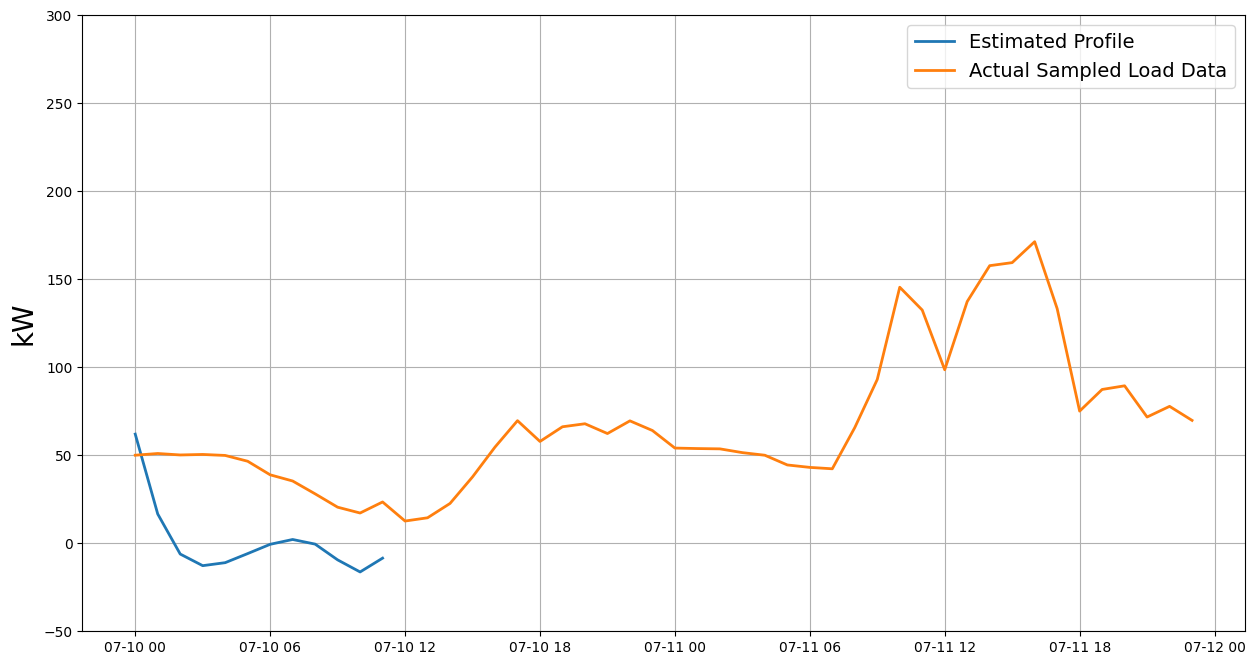

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

dateAxis = dbClass_Seoultech_Future.getGridSampledProfile(3600)[0][:12]
print(len(dateAxis))

plt.ylim([-50, 300])
plt.ylabel("kW", fontdict={"size":20})
plt.plot(dateAxis, estimated_Profile, linewidth= 2.0)
plt.plot(*dbClass_Seoultech_Future.getGridSampledProfile(3600), linewidth= 2.0)
plt.legend(["Estimated Profile", "Actual Sampled Load Data"], fontsize=14)
plt.grid()